# Advertising Sales Channel Prediction

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
df = pd.read_csv(r"F:\advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA

<AxesSubplot:xlabel='TV', ylabel='sales'>

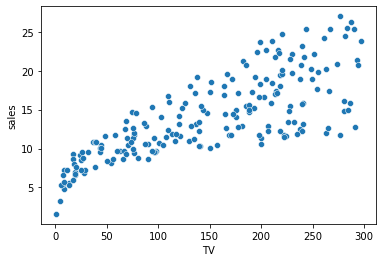

In [5]:
sns.scatterplot(data=df, x='TV', y='sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

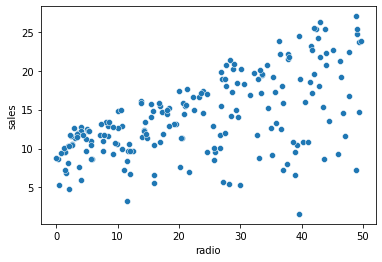

In [6]:
sns.scatterplot(data=df, x='radio', y='sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

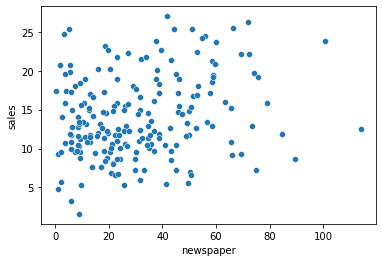

In [7]:
sns.scatterplot(data=df, x='newspaper', y='sales')

# Correlation

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

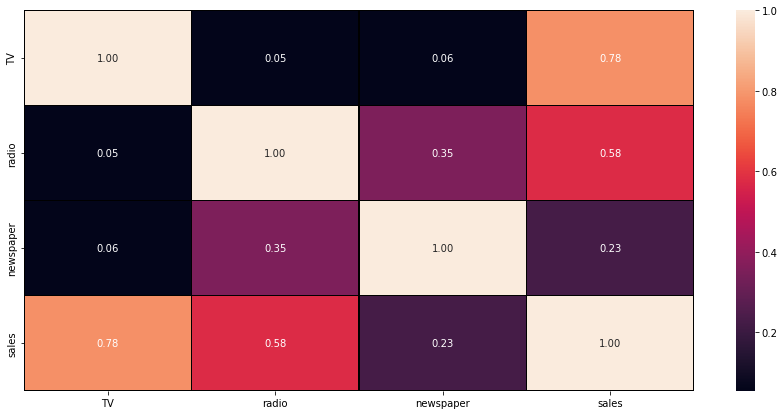

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black",fmt='.2f')

# Describing dataset

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


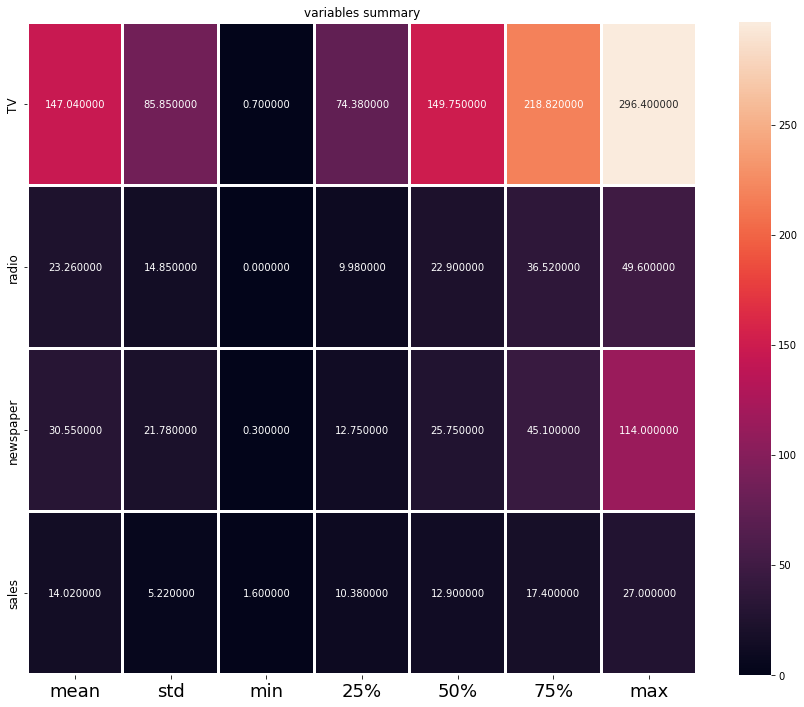

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variables summary')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Outliers Checking


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

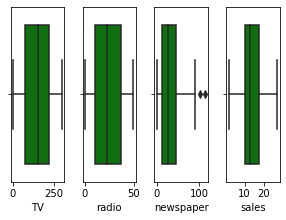

In [13]:
collist=df.columns.values
ncol=50
nrows=50
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skewness

In [14]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Normal Distribuiton Curve

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

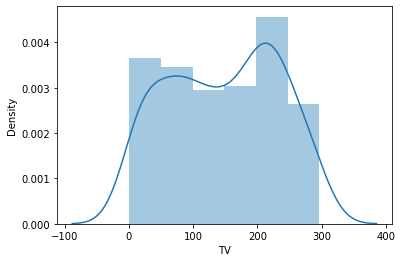

In [15]:
sns.distplot(df["TV"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

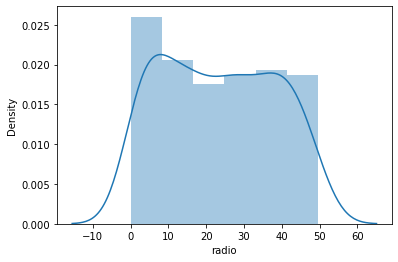

In [16]:
sns.distplot(df["radio"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

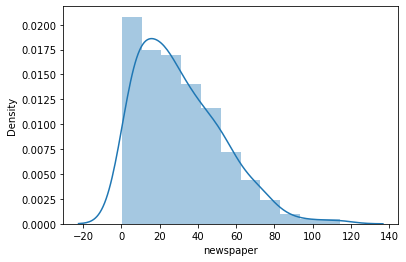

In [17]:
sns.distplot(df["newspaper"])

# The normal distritution shows, data is skewed.

# Data Cleaning :


In [18]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [19]:
delete=pd.DataFrame([["-0.051616", "Unnamed:0", "No", "Alot"]],columns=["Correlation with Target", "Column Name", "Normalised", "Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.051616,Unnamed:0,No,Alot


# Removing Outliers

In [20]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(200, 4)

In [21]:
threshold=3
print(np.where(z<3))

(array([  0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   2,   2,   3,
         3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,   6,   6,
         6,   6,   7,   7,   7,   7,   8,   8,   8,   8,   9,   9,   9,
         9,  10,  10,  10,  10,  11,  11,  11,  11,  12,  12,  12,  12,
        13,  13,  13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,
        16,  16,  17,  17,  17,  17,  18,  18,  18,  18,  19,  19,  19,
        19,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,  22,
        23,  23,  23,  23,  24,  24,  24,  24,  25,  25,  25,  25,  26,
        26,  26,  26,  27,  27,  27,  27,  28,  28,  28,  28,  29,  29,
        29,  29,  30,  30,  30,  30,  31,  31,  31,  31,  32,  32,  32,
        32,  33,  33,  33,  33,  34,  34,  34,  34,  35,  35,  35,  35,
        36,  36,  36,  36,  37,  37,  37,  37,  38,  38,  38,  38,  39,
        39,  39,  39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,
        42,  42,  43,  43,  43,  43,  44,  44,  44,  44,  45,  

In [22]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


# Percentage of Data Loss :

In [23]:
loss_percent=((200-198)/200)*100
print(loss_percent)

1.0


# Model without outliers is df and desired outliers is df_new

In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,:-1]

# Transforming data to remove skewness

In [25]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [26]:
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

# Splitting the dataframe 

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=ln.predict(x_test)
print(y_pred)

[[ 7.45826123e+01  2.27613201e+01  2.18132587e+01]
 [ 5.12371597e+01  1.34200972e+01  2.09648037e+01]
 [ 9.70328361e+01 -4.58366231e+00  2.51581134e+01]
 [ 2.76967451e+02  4.09642550e+01  5.25779207e+01]
 [ 1.75474956e+02  8.76684490e+00  3.77205996e+01]
 [ 5.84267542e+01  5.82175824e+00  3.18355667e+01]
 [-9.57219571e+00  4.60167399e+01  6.38664298e+01]
 [ 2.36391093e+02  7.69411887e+00  8.24658530e+00]
 [ 1.56810529e+01  3.57889408e+01  5.84900785e+01]
 [ 2.00780817e+02  2.52303879e+01  1.79351627e+01]
 [ 2.54257347e+02  4.12976127e+01  5.45857947e+01]
 [ 9.41987403e+01  1.37180302e+01  2.92975122e+01]
 [ 1.63190742e+02  2.86355585e-01  6.26700646e+00]
 [ 1.92214926e+02  2.31074858e+01  1.05203204e+01]
 [ 8.28912302e+01  2.84490858e+01  2.67895952e+01]
 [ 1.28948338e+02  2.17515040e+01  1.32586040e+01]
 [ 2.58132833e+02  2.17060779e+01 -1.50251468e+01]
 [-2.75382259e+01  3.86845068e+01  8.44256839e+00]
 [ 8.12986857e+01  4.61015014e+01  4.76528014e+01]
 [ 2.14487970e+02  2.63779500e+

In [31]:
#Evaluate model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9594008793981225

In [32]:
print('Coefficients: \n', ln.coef_)

Coefficients: 
 [[ 8.58855229e+01  5.24343571e-01 -3.13988349e-01]
 [-5.81275551e-02  1.45895083e+01  2.33543240e-01]
 [ 7.52312869e-01  1.19210864e+00  1.98853029e+01]]


In [33]:
predictions = ln.predict(x_test)

Text(0, 0.5, 'Predicted')

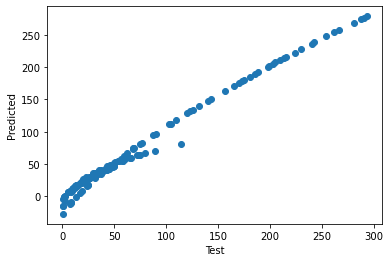

In [34]:
plt.scatter(y_test,predictions)
plt.xlabel('Test')
plt.ylabel('Predicted')

# Simple Linear Regression

In [35]:
#Initializing the variables
X = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

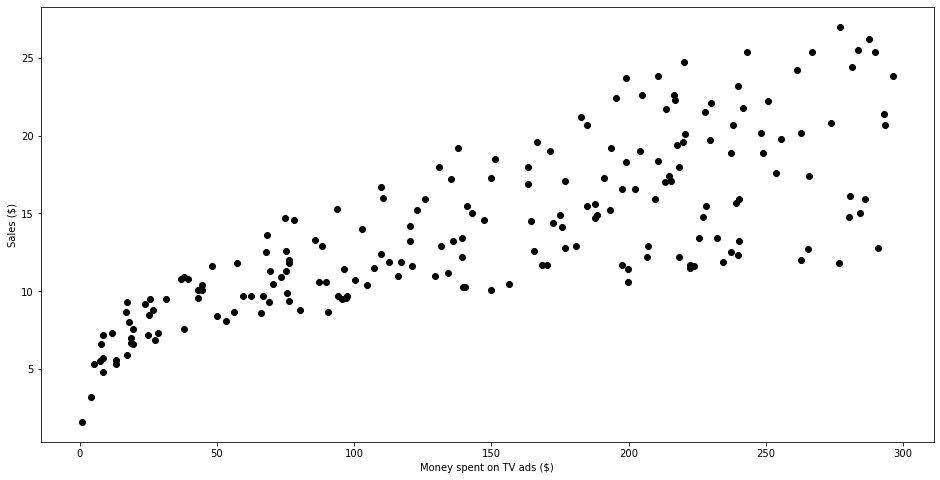

In [36]:
#Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [37]:

#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

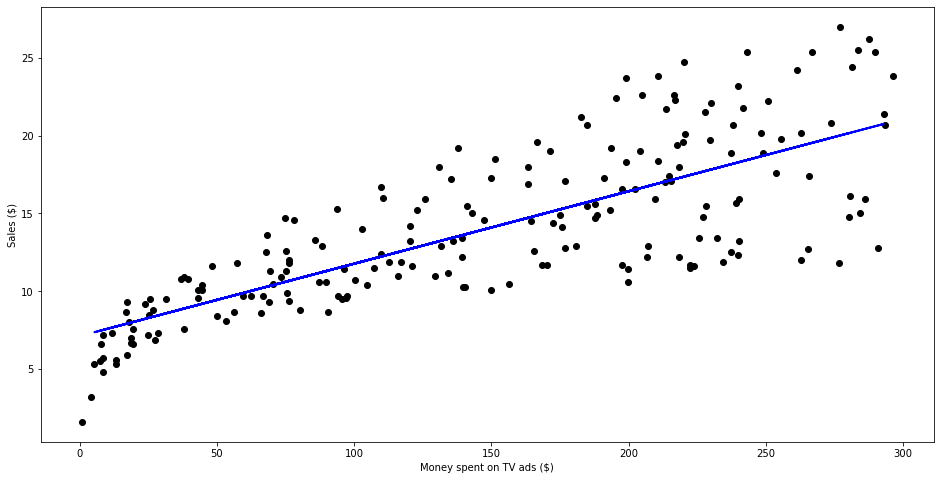

In [39]:
#predicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [40]:
#Calculating the Coefficients
reg.coef_

array([[0.04652973]])

In [41]:
#Calculating the Intercept
reg.intercept_

array([7.11963843])

In [42]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627077

In [43]:
output = reg.predict([[230.1]])
output

array([[17.82613016]])

# Multiple Linear Regression

In [44]:
#Initializing the variables
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

In [45]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)

In [48]:
#Calculating the Coefficients
multiple_reg.coef_

array([[0.04472952, 0.18919505, 0.00276111]])

In [49]:
#Calculating the Intercept
multiple_reg.intercept_

array([2.97906734])

In [50]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

In [52]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:
TV : 100
Radio : 100
Newspaper : 100
you will get Rs26.65 sales by advertising Rs100.0 on TV, Rs100.0 on Radio and Rs100.0 on newspaper.


# Model Saving :

In [53]:
import pickle
filename = 'Advertsing Sales Channel Prediction.pkl'
pickle.dump(ln, open(filename, 'wb'))